In [1]:
# 忽略警告
import warnings
warnings.filterwarnings('ignore')
 
# 导入数据处理包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# 导入绘图包
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
# 解决保存图像时符号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
 
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
# 导入数据
# 训练数据集
train = pd.read_csv('G:/机器学习课设/Kaggle数据/house-prices-advanced-regression-techniques/train.csv')
# 测试数据集
test = pd.read_csv('G:/机器学习课设/Kaggle数据/house-prices-advanced-regression-techniques/test.csv')
print('训练数据集：',train.shape,'测试数据集',test.shape)
# 记住训练数据和测试数据的大小，便于后续分析
train_shape = train.shape[0]
test_shape = test.shape[0]

训练数据集： (1460, 81) 测试数据集 (1459, 80)


In [2]:
# 查看训练数据中有什么字段
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# 查看前5行数据
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 查看统计信息
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# 目标值'房价'简单分析
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 
 sigma = 79415.29 



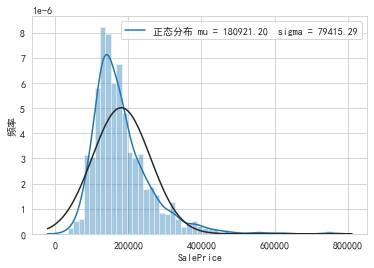

In [6]:
# 使用Seaborn自带的distplot()函数实现用分布曲线拟合目标的分布
sns.distplot(train['SalePrice'],fit= norm)
# 得到最接近真实分布的正态分布的参数：mu——期望；sigma——标准差
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} \n sigma = {:.2f} \n'.format(mu,sigma))
# 对图像参数指定
plt.legend(['正态分布 mu = {:.2f}  sigma = {:.2f}'.format(mu,sigma)], loc = 'best')
plt.ylabel('频率')
plt.xlabel('SalePrice')
plt.show()

In [7]:
# 偏度与峰度
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

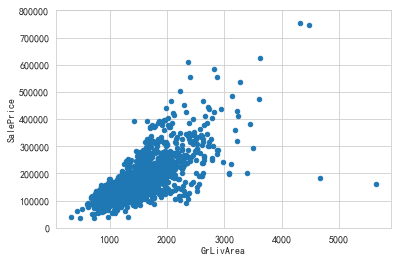

In [8]:
# GrLivArea/SalePrice
data = pd.concat([train['SalePrice'],train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))
# 看起来SalePrice与GrLivArea是线性关系

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

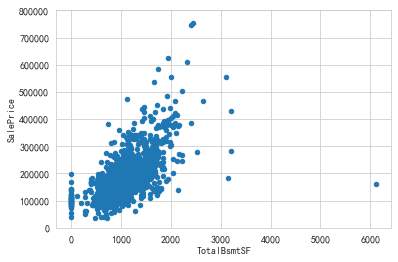

In [9]:
# TotalBsmtSF/SalePrice
data = pd.concat([train['SalePrice'],train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice',ylim=(0,800000))
# 看起来SalePrice与TotalBsmtSF像指数关系

(-0.5, 9.5, 0.0, 800000.0)

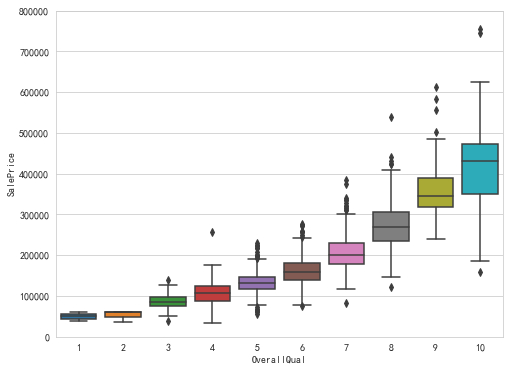

In [10]:
# OverallQual/SalePrice
data = pd.concat([train['SalePrice'],train['OverallQual']], axis=1)
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual",y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)
# SalePrice与OverallQual成正相关

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

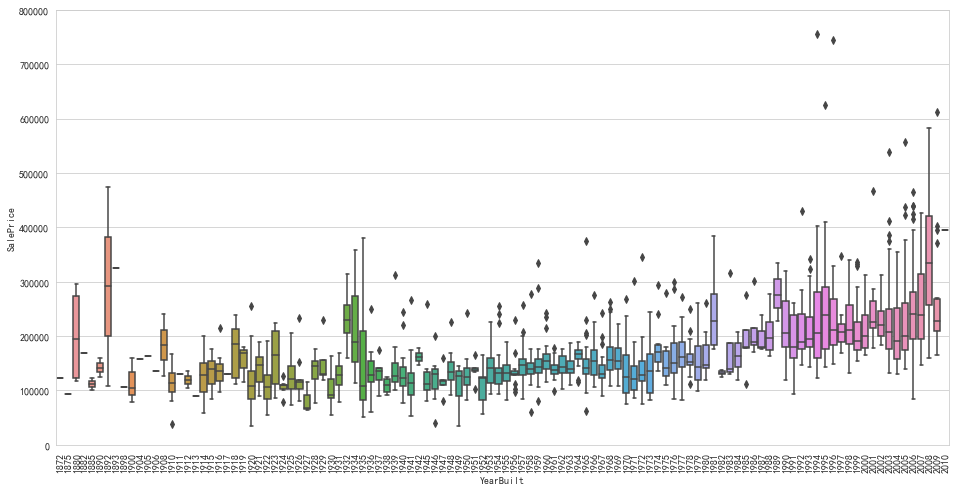

In [11]:
# YearBuilt/SalePrice
data = pd.concat([train['SalePrice'],train['YearBuilt']], axis=1)
plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
# 虽然趋势并不强,但个人认为修建年份(YearBuilt)越新,房价'SalePrice'越高

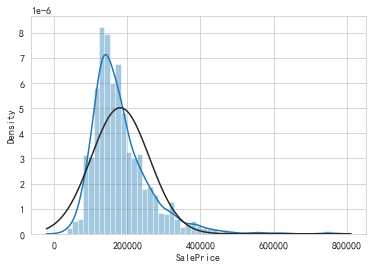

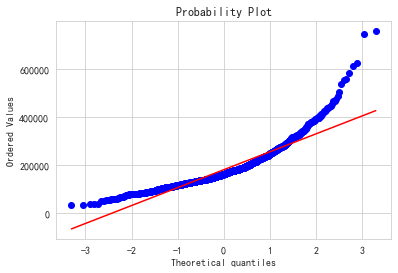

In [12]:
# 直方图和正态概率图
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
# 正态分布检验
res = stats.probplot(train['SalePrice'], plot=plt)

In [13]:
# 对数变换
train['SalePrice'] = np.log(train['SalePrice'])

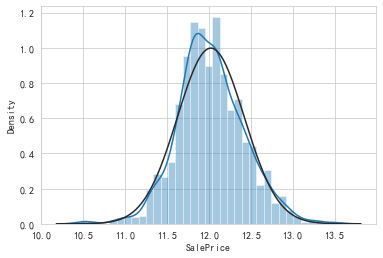

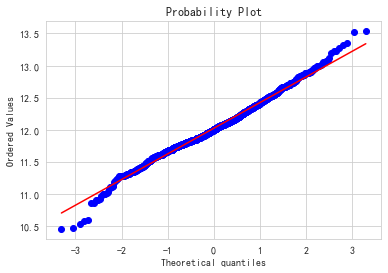

In [14]:
# 变化后的直方图与正态概率图
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

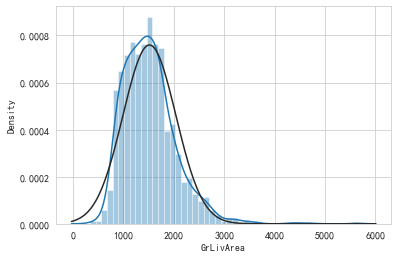

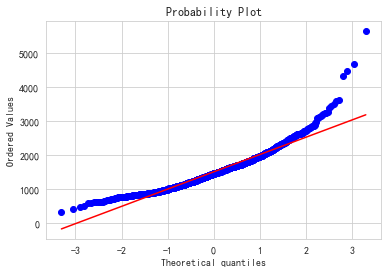

In [15]:
# 直方图与正态概率图
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [16]:
# 对数变换
train['GrLivArea'] = np.log(train['GrLivArea'])

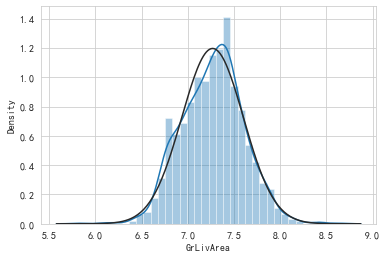

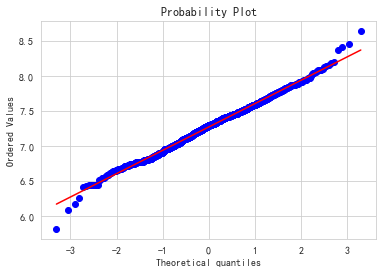

In [17]:
# 变化后的直方图与正态概率图
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

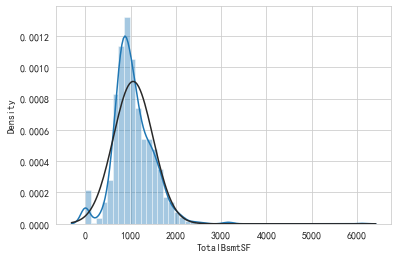

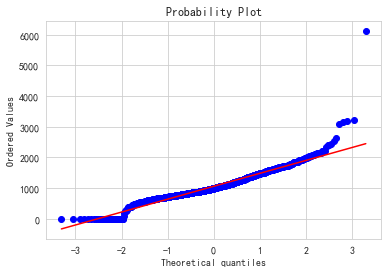

In [18]:
# 直方图与正态概率图
sns.distplot(train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [19]:
# 为新变量创建一列
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [20]:
# 数据变换
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

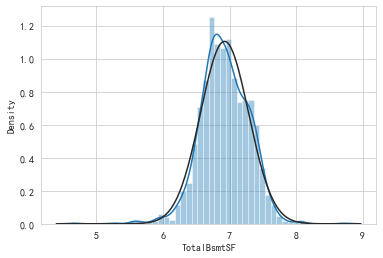

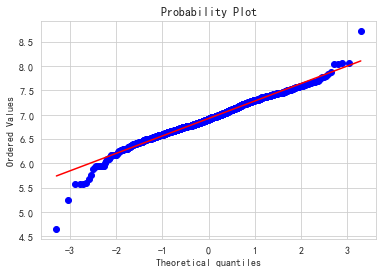

In [21]:
# 直方图与正态概率图
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

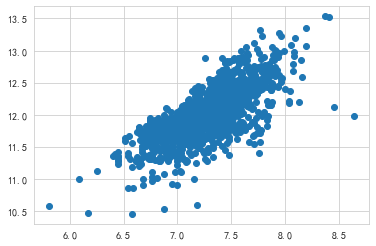

In [22]:
# 散点图 GrLivArea/SalePrice
plt.scatter(train['GrLivArea'], train['SalePrice'])

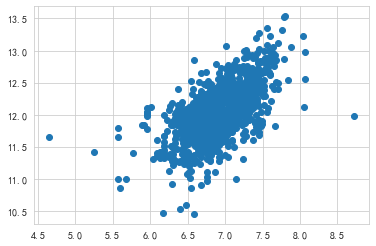

In [23]:
# 散点图
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice'])

In [24]:
# 缺失值情况
# 合并数据集，方便数据清洗
full = train.append(test,ignore_index = True)
full.shape

(2919, 82)

In [25]:
# 判定是否有缺失值
full_null = full.isnull()
# 计算每列缺失值数量
full_null = full_null.sum()
# 挑选有缺失的列
full_null= full_null[full_null > 0]
full_null.sort_values(inplace = True)
full_null.shape

(36,)

In [26]:
full_null.head(20)

Electrical       1
SaleType         1
GarageArea       1
Exterior1st      1
Exterior2nd      1
GarageCars       1
KitchenQual      1
TotalBsmtSF      1
BsmtFinSF1       1
BsmtUnfSF        1
BsmtFinSF2       1
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFullBath     2
MSZoning         4
MasVnrArea      23
MasVnrType      24
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

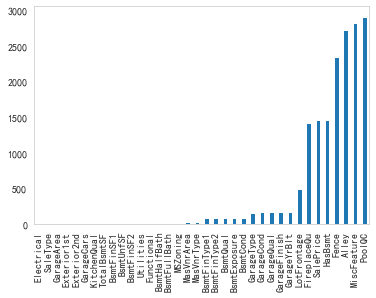

In [27]:
# 可视化缺失值
full_null.plot.bar(grid = False)
plt.show()

In [28]:
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
        ,'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
        'Fence','MiscFeature']
for i in cols:
    full[i] = full[i].fillna('None')

In [29]:
# 查看填充后的情况
full_null = full.isnull()
# 计算每列缺失值数量
full_null = full_null.sum()
# 挑选有缺失的列
full_null= full_null[full_null > 0]
full_null.sort_values(inplace = True)
print(full_null.shape)
full_null

(22,)


TotalBsmtSF        1
SaleType           1
Exterior1st        1
Exterior2nd        1
GarageArea         1
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
GarageYrBlt      159
LotFrontage      486
SalePrice       1459
HasBsmt         1459
dtype: int64

In [30]:
full['LotFrontage'] = full.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
full['GarageYrBlt'] = full['GarageYrBlt'].fillna(0)
full['GarageArea'] = full['GarageArea'].fillna(0)
full['GarageCars'] = full['GarageCars'].fillna(0)
full['MasVnrType'] = full['MasVnrType'].fillna('None')
full['MasVnrArea'] = full['MasVnrArea'].fillna(0)
full['MSZoning'] = full['MSZoning'].fillna(full['MSZoning'].mode()[0])

In [31]:
full['Utilities'] = full['Utilities'].fillna('none')
full['BsmtFullBath'] = full['BsmtFullBath'].fillna(0)
full['BsmtHalfBath'] = full['BsmtHalfBath'].fillna(0)
full['Functional'] = full['Functional'].fillna('Typ')
full['Functional'] = full['Functional'].fillna('Typ')
full['BsmtUnfSF'] = full['BsmtUnfSF'].fillna(0)
full['BsmtFinSF2'] = full['BsmtFinSF2'].fillna(0)
full['BsmtFinSF1'] = full['BsmtFinSF1'].fillna(0)
full['TotalBsmtSF'] = full['TotalBsmtSF'].fillna(0)

In [32]:
full['SaleType'].head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

In [33]:
full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0])
full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0])
full['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [34]:
full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])
full['Exterior1st'] = full['Exterior1st'].fillna(0)
full['Exterior2nd'] = full['Exterior2nd'].fillna(0)
full_null = full.isnull().sum()
full_null.head()

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

In [35]:
full_null = full_null.drop(full_null[full_null == 0].index)
full_null

SalePrice    1459
HasBsmt      1459
dtype: int64

In [36]:
# 分离出训练数据
train_anal = full.loc[:train_shape-1][:]
print(train_anal.shape)

# 分离出测试数据
test_anal = full.loc[:test_shape-1:][:]
print(test_anal.shape)
# 选择出数值型数据
train_anal_numcol = list(train_anal.select_dtypes(
    include = ['number']).columns)
# 移除Id和SalePrice
train_anal_numcol.remove('Id')
train_anal_numcol.remove('SalePrice')
# 使用melt()函数将二维表转化为一维连续表格，并画出其分布图
train_anal_num_plot = pd.melt(train_anal,value_vars = train_anal_numcol)
train_anal_num_plot.head()

(1460, 82)
(1459, 82)


,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


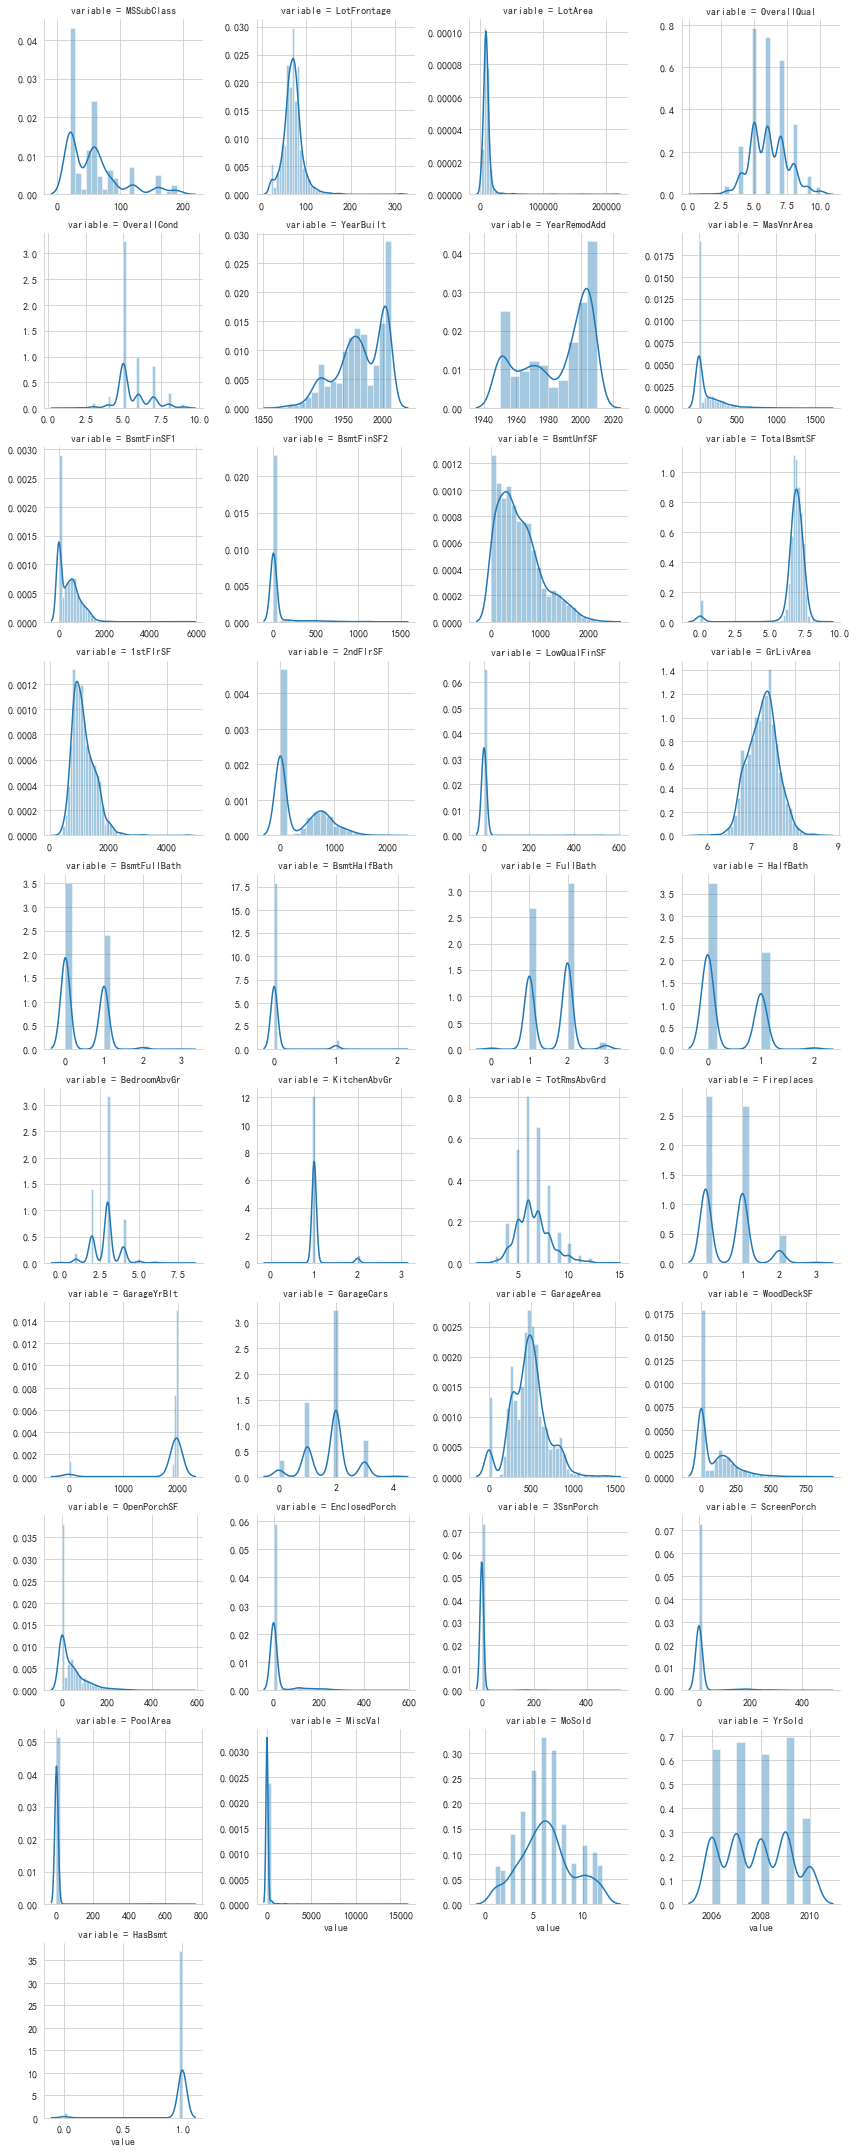

In [37]:
# 使用seaborn的FacetGrid()函数可以做出此类数据的分布和拟合曲线
plot = sns.FacetGrid(train_anal_num_plot,col = 'variable',
                     col_wrap = 4,sharex = False,sharey = False)
show_plot = plot.map(sns.distplot,'value')
plt.show()

In [38]:
# 转化为str类型
col_into_str = ['GarageYrBlt','MSSubClass','MoSold','YrSold','OverallCond','OverallQual']
for i in col_into_str:
    train_anal[i] = train_anal[i].astype(str)
    test_anal[i] = test_anal[i].astype(str)

In [39]:
# 选择出obj类型数据
train_anal_objcol = list(train_anal.select_dtypes(include = ['object']).columns)
# 将obj转化为category类型
for i in train_anal_objcol:
    train_anal[i] = train_anal[i].astype('category')

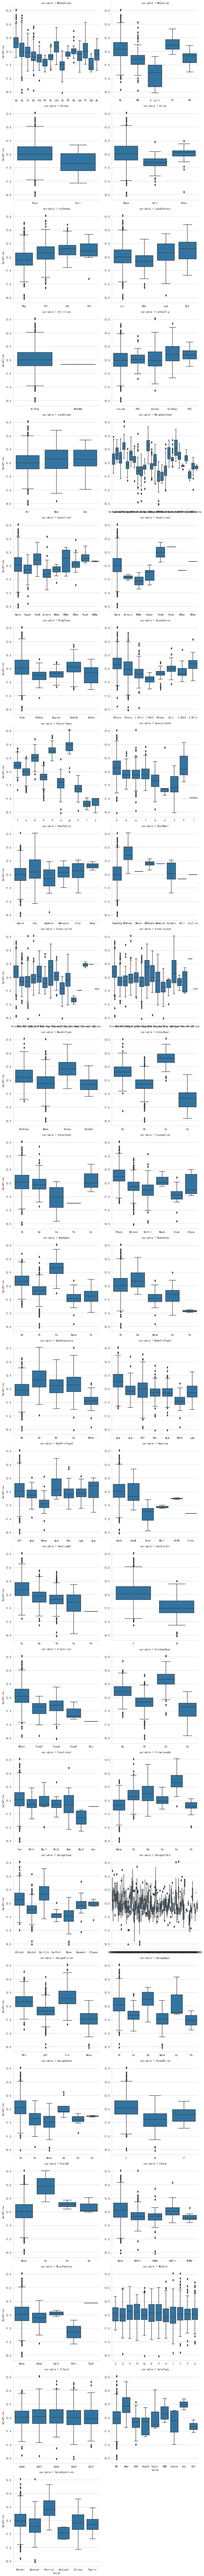

In [40]:
# 使用melt()函数转化为一维数据，在一张图中展示出来，方便比较
train_anal_obj_plot = pd.melt(train_anal,id_vars = ['SalePrice'],
                              value_vars = train_anal_objcol)
# 绘制箱形图
train_anal_obj_plot_box = sns.FacetGrid(train_anal_obj_plot,col = 'variable',
                                      col_wrap = 2,
                                      sharex = False,sharey = False,
                                      size = 5
                                       )
train_anal_obj_plot_box
train_anal_obj_plot_box = train_anal_obj_plot_box.map(sns.boxplot,'value',
                                                      'SalePrice')
plt.show()

In [41]:
# 选择以下列进行编码,并作为特征
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual',
        'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure',
        'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',  'YrSold',
        'MoSold')
cols = list(cols)
full[cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,None,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,Reg,Y,Pave,None,Y,60,5,2008,2
1,TA,Gd,TA,TA,TA,TA,TA,Ex,None,TA,...,Gtl,Reg,Y,Pave,None,Y,20,8,2007,5
2,TA,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,60,5,2008,9
3,Gd,TA,Gd,TA,TA,TA,TA,Gd,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,70,5,2006,2
4,TA,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,60,5,2008,12


In [42]:
# 导入lable_encolder包
from sklearn.preprocessing import LabelEncoder
# 使用循环,编码所选列
for i in cols:
    le = LabelEncoder()
    le.fit(list(full[i].values))
    full[i] = le.transform(full[i].values)
full[cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,5,4,2,1
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,0,7,1,4
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,5,4,2,8
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,6,4,0,1
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,5,4,2,11


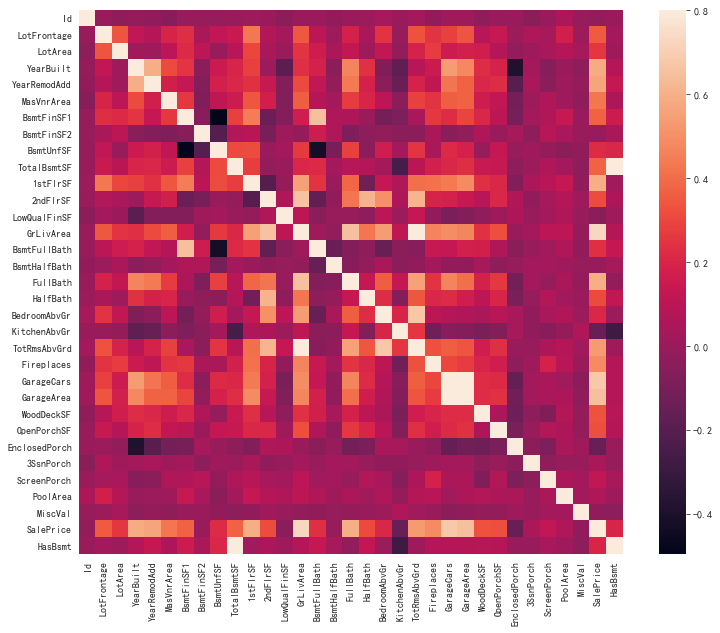

In [43]:
# 绘制热力图,观察各列相关性大小
corr = train_anal.corr()
f = plt.subplots(figsize = (13,10))
sns.heatmap(corr,vmax = 0.8,square = True)
plt.show()

In [44]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
GrLivArea        0.730255
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
TotalBsmtSF      0.373009
BsmtFinSF1       0.372023
LotFrontage      0.351233
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
HasBsmt          0.199634
ScreenPorch      0.121208
PoolArea         0.069798
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

(1460, 82)


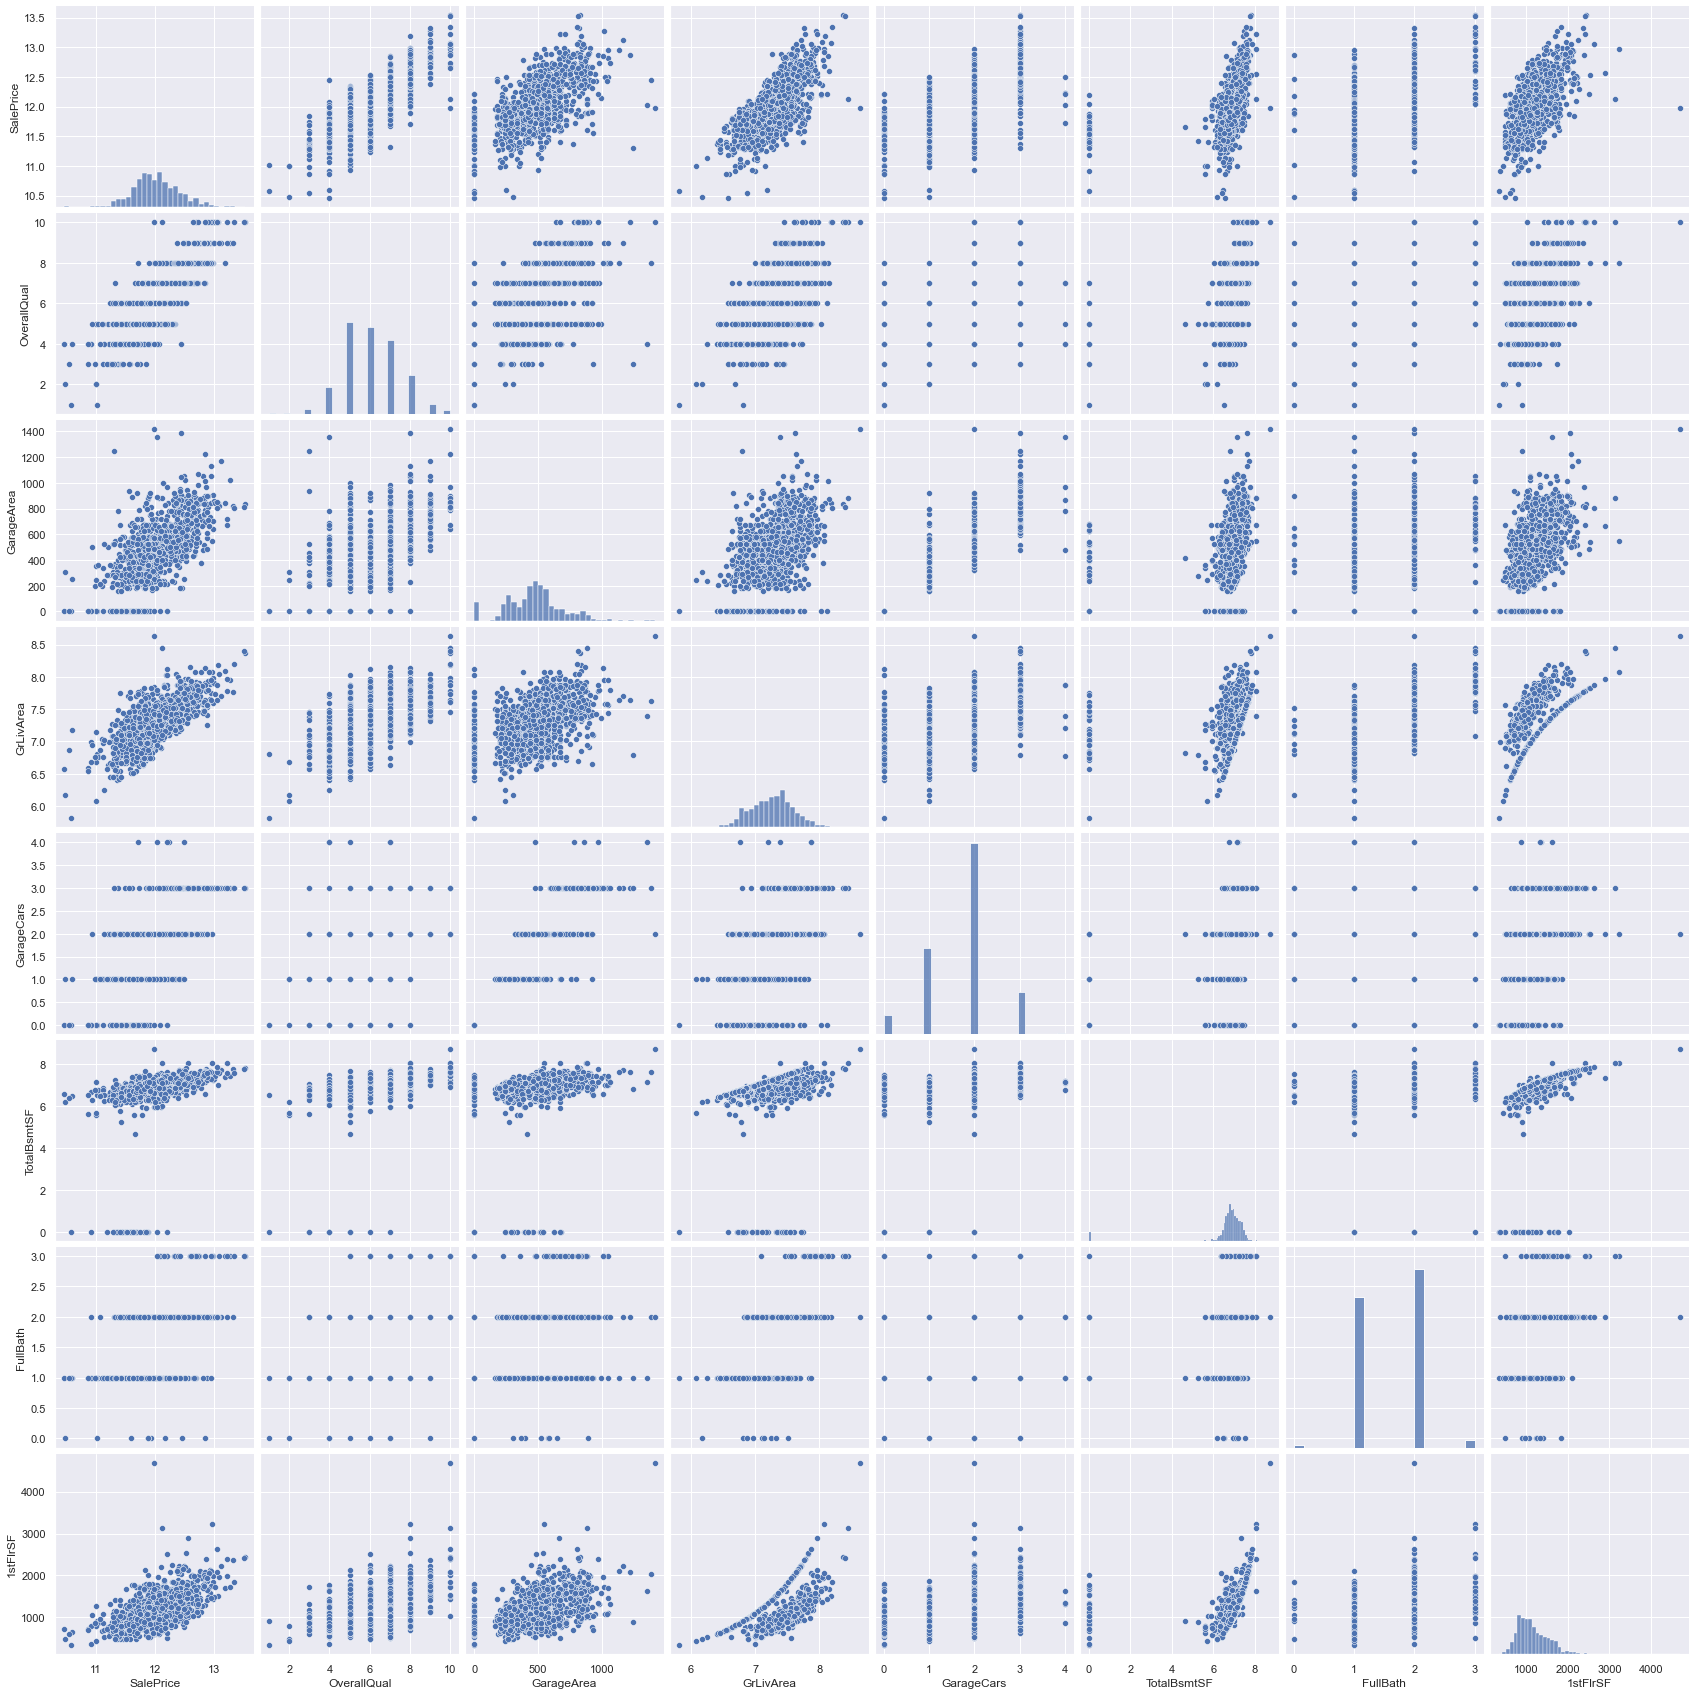

In [45]:
# 绘制散点图,观察相关性较大的列和目标值的分布,找出异常值
sns.set()
col_scatterplot = ['SalePrice', 'OverallQual', 'GarageArea',
                   'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                   'FullBath','1stFlrSF']
scatter_train = full.loc[:train_shape-1][:]
print(train_anal.shape)
sns.pairplot(scatter_train[col_scatterplot],size = 3)
plt.show()

In [46]:
# 删除GrLivArea、FullBath、1stFlrSF的异常值
full = full.drop(full[(full['GrLivArea']>4000) & (full['SalePrice']<12.5)].index)
full.shape

(2919, 82)

In [47]:
full = full.drop(full[(full['TotalBsmtSF']>4000) & (full['SalePrice']<12.5)].index)
full = full.drop(full[(full['1stFlrSF']>4000) & (full['SalePrice']<12.5)].index)
full.shape

(2918, 82)

In [48]:
# 选择出数值类数据
full_num_col = full.dtypes[full.dtypes != 'object'].index
full_num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'HasBsmt'],
      dtype='object')

In [49]:
# 计算每列偏离度
skewed = full[full_num_col].apply(lambda x:skew(x.dropna())).sort_values(
    ascending = False)
skewed = pd.DataFrame(skewed)
skewed

,0
MiscVal,21.943434
PoolArea,17.691725
LotArea,13.028401
LowQualFinSF,12.086650
3SsnPorch,11.374072
...,...
GarageYrBlt,-3.905419
Functional,-4.054942
HasBsmt,-6.038083
Street,-15.497445


In [50]:
# 去除分析的目标SalePrice
skewed = skewed.drop(['SalePrice'])
skewed = skewed.drop(['Id'])
  
# 选择出偏离值绝对值大于0.75的列进行转化
skewed = skewed[abs(skewed) > 0.75]
 
#导入boxcox计算包
from scipy.special import boxcox1p

In [51]:
# 使用boxcox1p函数,制定lam参数为0.15
skewed_col = list(skewed.index)
lam = 0.15
for i in skewed_col:
    full[i] = boxcox1p(full[i],lam)

In [52]:
# 选取数值型特征
col_num = corr['SalePrice'].sort_values(ascending = False)
col_num_highcorr = col_num[col_num > 0.3]
col_num_highcorr = list(col_num_highcorr.index)
col_num_highcorr.remove('SalePrice')
col_num_highcorr = full[col_num_highcorr]
col_num_highcorr.head()

,GrLivArea,GarageCars,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea,TotalBsmtSF,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,2ndFlrSF,HalfBath
0,2.514395,1.194318,10.506271,11.692623,1.194318,14.187527,14.187527,2.602594,0.000000,8.059126,2.397400,11.170327,5.831328,0.000000,5.714669,11.686189,0.730463
1,2.464074,1.194318,10.062098,12.792276,1.194318,14.145138,14.145138,2.259674,0.730463,0.000000,2.464074,12.062832,6.221214,9.010206,0.000000,0.000000,0.000000
2,2.521471,1.194318,10.775536,11.892039,1.194318,14.184404,14.185966,2.259674,0.730463,7.646538,2.409996,10.200343,5.914940,0.000000,5.053371,11.724598,0.730463
3,2.515061,1.540963,10.918253,12.013683,0.730463,14.047529,14.135652,2.440268,0.730463,0.000000,2.375462,8.274266,5.684507,0.000000,4.745132,11.354094,0.000000
4,2.554831,1.540963,11.627708,12.510588,1.194318,14.182841,14.182841,2.750250,0.730463,9.391827,2.447621,10.971129,6.314735,8.013884,6.314735,12.271365,0.730463


In [53]:
col_num_highcorr.shape

(2918, 17)

In [54]:
#选择分类型数值
cat_cols = full[cols]
cat_cols.shape

(2918, 26)

In [55]:
full_X = pd.concat([col_num_highcorr,cat_cols],axis = 1)
full_X.head()

,GrLivArea,GarageCars,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,2.514395,1.194318,10.506271,11.692623,1.194318,14.187527,14.187527,2.602594,0.000000,8.059126,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,0.730463
1,2.464074,1.194318,10.062098,12.792276,1.194318,14.145138,14.145138,2.259674,0.730463,0.000000,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,0.000000,2.440268,0.730463,1.820334
2,2.521471,1.194318,10.775536,11.892039,1.194318,14.184404,14.185966,2.259674,0.730463,7.646538,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,2.602594
3,2.515061,1.540963,10.918253,12.013683,0.730463,14.047529,14.135652,2.440268,0.730463,0.000000,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.259674,1.820334,0.000000,0.730463
4,2.554831,1.540963,11.627708,12.510588,1.194318,14.182841,14.182841,2.750250,0.730463,9.391827,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,3.011340


In [56]:
full_X.shape

(2918, 43)

In [57]:
# 将所有分类型变量进行编码
full_X = pd.get_dummies(full_X)
print(full_X.shape)
full_X.head()

(2918, 43)


,GrLivArea,GarageCars,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,2.514395,1.194318,10.506271,11.692623,1.194318,14.187527,14.187527,2.602594,0.000000,8.059126,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,0.730463
1,2.464074,1.194318,10.062098,12.792276,1.194318,14.145138,14.145138,2.259674,0.730463,0.000000,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,0.000000,2.440268,0.730463,1.820334
2,2.521471,1.194318,10.775536,11.892039,1.194318,14.184404,14.185966,2.259674,0.730463,7.646538,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,2.602594
3,2.515061,1.540963,10.918253,12.013683,0.730463,14.047529,14.135652,2.440268,0.730463,0.000000,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.259674,1.820334,0.000000,0.730463
4,2.554831,1.540963,11.627708,12.510588,1.194318,14.182841,14.182841,2.750250,0.730463,9.391827,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,3.011340


In [58]:
full = pd.get_dummies(full)
full.shape

(2918, 227)

In [59]:
full.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2.055642,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,2,0.000000,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,...,0,0,0,1,0,0,0,0,1,0
2,3,2.055642,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,4,2.259674,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,5,2.055642,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [60]:
# 分离出训练数据和测试数据
train = full[0:train_shape-1-2][:]
test = full[test_shape-1-2:][:]
train_shape

1460

In [61]:
# 原始数据集特征
source_X = full_X.loc[0:train_shape-1,:]
# 原始数据集标签
source_y = full.loc[0:train_shape-1,'SalePrice']
 
# 预测数据集特征
pred_X = full_X.loc[train_shape:,:]
# 检查分割是否正确
print('souce_X shape:',source_X.shape[0])
print('pred_X shape:',pred_X.shape[0])

souce_X shape: 1459
pred_X shape: 1459


In [62]:
from sklearn.model_selection import train_test_split
 
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size = 0.8)
 
# 输出数据集大小
print ('原始数据集特征：',source_X.shape, 
       '\n训练数据集特征：',train_X.shape ,
      '\n测试数据集特征：',test_X.shape)
 
print ('\n原始数据集标签：',source_y.shape, 
       '\n训练数据集标签：',train_y.shape ,
      '\n测试数据集标签：',test_y.shape)

原始数据集特征： (1459, 43) 
训练数据集特征： (1167, 43) 
测试数据集特征： (292, 43)

原始数据集标签： (1459,) 
训练数据集标签： (1167,) 
测试数据集标签： (292,)


In [63]:
# 线性回归模型
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

In [64]:
# LassoCV模型
from sklearn.linear_model import LassoCV
model_LassoCV = LassoCV(alphas = [1,0.1,0.001,0.005])

In [65]:
# 1.逻辑回归模型：
model_linear.fit(train_X,train_y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# 2.LassoCV模型：
model_LassoCV.fit(train_X,train_y)
LassoCV(alphas=[1, 0.1, 0.001, 0.005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

LassoCV(alphas=[1, 0.1, 0.001, 0.005], n_jobs=1)

In [66]:
# 导入cross_val_score（）函数
from sklearn.model_selection import  KFold,cross_val_score

In [67]:
# 定义评估函数
n_folds = 5
 
def resle_cv(model):
    kf = KFold(n_folds,shuffle = True,random_state = 42).get_n_splits(source_X,source_y)
    rmse = np.sqrt(-cross_val_score(model,source_X,source_y,
                                    scoring='neg_mean_squared_error',
                                   cv = kf))
    return (rmse)

In [68]:
# model_linear评估
score_model_linear = resle_cv(model_linear)
score_model_linear = [score_model_linear.mean(),score_model_linear.std()]
score_model_linear

[0.14250834621125635, 0.014394794283975205]

In [69]:
# model_LassoCV评估
score_model_LassoCV = resle_cv(model_LassoCV)
score_model_LassoCV  = [score_model_LassoCV.mean(),score_model_LassoCV.std()]
score_model_LassoCV

[0.14980910475034426, 0.014934866277260013]

In [70]:
# 使用机器学习模型预测
pred_li = model_linear.predict(pred_X)
pred_Y = model_LassoCV.predict(pred_X)
#Id
Id = full.loc[train_shape:,'Id']

In [71]:
pred_li = np.exp(pred_li)
pred_Y = np.exp(pred_Y)
# 生成结果数据框
predDf = pd.DataFrame(
            {'Id':Id,
            'SalePrice':pred_Y*0.3 + pred_li*0.7}
)
predDf.shape
predDf.head()

,Id,SalePrice
1460,1461,1.038036e+17
1461,1462,3.150507e+18
1462,1463,2.091552e+19
1463,1464,1.980824e+19
1464,1465,2.591545e+18


In [72]:
# 保存结果
predDf.to_csv('G:\机器学习课设\Kaggle数据\houseprice_Predict_l224Python.csv',index = False)